In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import warnings
import random
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn import metrics
import statsmodels.api as sm
import scipy.stats as stats 
from sklearn.linear_model import LogisticRegression , LinearRegression

from datetime import datetime
random.seed(datetime.now())
warnings.filterwarnings('ignore')

# Make plots larger
plt.rcParams['figure.figsize'] = (10, 6)

import os.path
userhome = os.path.expanduser('~')
csvfile = os.path.join(userhome, 'Desktop', 'final', 'Dengue_Daily_EN.csv')
df = pd.read_csv(csvfile)

/Users/pipiterry/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/pipiterry/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df.drop(df.columns[[1,7,8,14,15,16,17,19,26,27,28,29]], axis=1, inplace=True)
df.head()

,Date_Onset,Date_Notification,Sex,Age_Group,County_living,Township_living,Enumeration_unit,Enumeration_unit_long,Enumeration_unit_lat,First_level_dissemination_unit,Second_level_dissemination_unit,Imported,Number_of_confirmed_cases,Serotype,MOI_County_living_Code,MOI_Township_living_Code,MOI_County_living,MOI_Township_living
0,1998/01/02,1998/01/07,M,40-44,Pingtung County,Pingtung City,A1320-0136-00,120.50588,22.46425,A1320-04-008,A1320-04,N,1,NaN,10013.0,1001301.0,Pingtung County,Pingtung City
1,1998/01/03,1998/01/14,M,30-34,Pingtung County,Donggang Township,A1303-0150-00,120.45364,22.46639,A1303-09-007,A1303-09,Y,1,DENV2,10013.0,1001303.0,Pingtung County,Donggang Township
2,1998/01/13,1998/02/18,M,55-59,Yilan County,Yilan City,A0201-0449-00,121.75143,24.74922,A0201-23-006,A0201-23,Y,1,NaN,10002.0,1000201.0,Yilan County,Yilan City
3,1998/01/15,1998/01/23,M,35-39,Kaohsiung City,Lingya Dist.,A6408-0153-00,120.33814,22.63032,A6408-10-010,A6408-10,N,1,NaN,64.0,6400800.0,Kaohsiung City,Lingya District
4,1998/01/20,1998/02/04,M,55-59,Yilan County,Wujie Township,A0209-0232-00,121.79826,24.68457,A0209-10-005,A0209-10,N,1,NaN,10002.0,1000209.0,Yilan County,Wujie Township


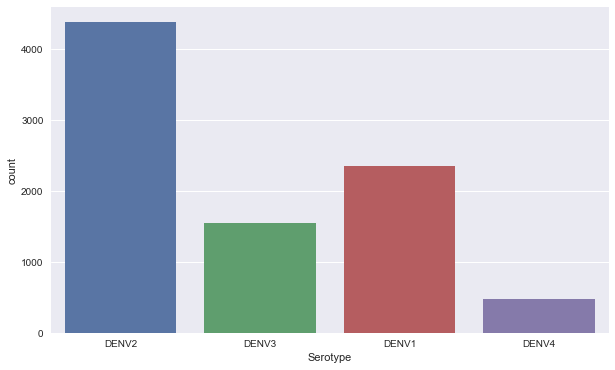

In [3]:
sns.countplot(x="Serotype", data=df)
plt.show()

In [4]:
#預測血清也就是serotype的類型
#首先我要提取年齡，居住地，還有血清類型來做測試，在此之前我需要做歸一化，跟清理掉空的數據
df['Serotype'].replace('', np.nan, inplace=True)
df.dropna(subset=['Serotype'], inplace=True)
df.isnull().any()

Date_Onset                         False
Date_Notification                  False
Sex                                False
Age_Group                          False
County_living                      False
Township_living                    False
Enumeration_unit                    True
Enumeration_unit_long               True
Enumeration_unit_lat                True
First_level_dissemination_unit      True
Second_level_dissemination_unit     True
Imported                           False
Number_of_confirmed_cases          False
Serotype                           False
MOI_County_living_Code              True
MOI_Township_living_Code            True
MOI_County_living                   True
MOI_Township_living                 True
dtype: bool

In [5]:
#這裡開始是把文字描述變成數字去呈現
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
le=preprocessing.LabelEncoder()
le.fit(df.Age_Group)
list(le.classes_)
df['Age_Group'].replace('0', '0-9', inplace=True)
df['Age_Group'].replace('1', '0-9', inplace=True)
df['Age_Group'].replace('2', '0-9', inplace=True)
df['Age_Group'].replace('3', '0-9', inplace=True)
df['Age_Group'].replace('4', '0-9', inplace=True)
df['Age_Group'].replace('5-9', '0-9', inplace=True)
le.fit(df.Age_Group)
list(le.classes_)

['0-9',
 '10-14',
 '15-19',
 '20-24',
 '25-29',
 '30-34',
 '35-39',
 '40-44',
 '45-49',
 '50-54',
 '55-59',
 '60-64',
 '65-69',
 '70+']

In [6]:
df.Age_Group=le.transform(df.Age_Group)
le.fit(df.County_living)
list(le.classes_)

['Changhua County',
 'Chiayi City',
 'Chiayi County',
 'Hsinchu City',
 'Hsinchu County',
 'Hualien County',
 'Kaohsiung City',
 'Keelung City',
 'Kinmen County',
 'Miaoli County',
 'Nantou County',
 'New Taipei City',
 'Penghu County',
 'Pingtung County',
 'Taichung City',
 'Tainan City',
 'Taipei City',
 'Taitung County',
 'Taoyuan City',
 'Yilan County',
 'Yunlin County']

In [7]:
df.County_living=le.transform(df.County_living)
df.head()

,Date_Onset,Date_Notification,Sex,Age_Group,County_living,Township_living,Enumeration_unit,Enumeration_unit_long,Enumeration_unit_lat,First_level_dissemination_unit,Second_level_dissemination_unit,Imported,Number_of_confirmed_cases,Serotype,MOI_County_living_Code,MOI_Township_living_Code,MOI_County_living,MOI_Township_living
1,1998/01/03,1998/01/14,M,5,13,Donggang Township,A1303-0150-00,120.45364,22.46639,A1303-09-007,A1303-09,Y,1,DENV2,10013.0,1001303.0,Pingtung County,Donggang Township
10,1998/02/17,1998/02/23,F,5,6,Fengshan Dist.,A6412-1199-00,120.33998,22.60702,A6412-A3-688,A6412-A3,N,1,DENV2,64.0,6401200.0,Kaohsiung City,Fongshan District
12,1998/03/05,1998/03/11,M,7,6,Fengshan Dist.,A6412-1737-00,120.32672,22.58874,A6412-F0-967,A6412-F0,N,1,DENV3,64.0,6401200.0,Kaohsiung City,Fongshan District
16,1998/03/22,1998/03/27,M,5,6,Qianzhen Dist.,A6409-0569-00,120.31874,22.58656,A6409-61-010,A6409-61,N,1,DENV3,64.0,6400900.0,Kaohsiung City,Cianjhen Distric
17,1998/03/23,1998/03/27,M,6,6,Qianzhen Dist.,A6409-0509-00,120.31139,22.59085,A6409-63-007,A6409-63,N,1,DENV3,64.0,6400900.0,Kaohsiung City,Cianjhen Distric


In [8]:
le.fit(df.Sex)
list(le.classes_)

['F', 'M']

In [9]:
#清掉空資料的情況，U表示有不知道
df['Sex'].replace('U', np.nan, inplace=True)
df.dropna(subset=['Sex'], inplace=True)
le.fit(df.Sex)
list(le.classes_)
df.Sex=le.transform(df.Sex)

In [18]:
# knn begin
X = np.array(df[['Age_Group','County_living','Sex']])
Y = np.array(df['Serotype'])
X.shape,Y.shape

((8752, 3), (8752,))

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train.shape,y_train.shape

((6126, 3), (6126,))

In [20]:
#导入机器学习KNN分析库
from sklearn.neighbors import KNeighborsClassifier

#将训练集代入到KNN模型中
clf = KNeighborsClassifier(n_neighbors=20)
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [21]:
#使用测试集衡量模型准确度
clf.score(X_test, y_test)

0.61728865194211724

In [23]:
new_data = np.array([[0,2,1]])
#对新数据进行分类预测
clf.predict(new_data)

array(['DENV1'], dtype=object)

In [24]:
#新数据属于每一个分类的概率
clf.classes_,clf.predict_proba(new_data)

(array(['DENV1', 'DENV2', 'DENV3', 'DENV4'], dtype=object),
 array([[ 0.45,  0.25,  0.15,  0.15]]))

In [25]:
#查看分類的確切情況
from sklearn import tree
# 建立分類器
clf2 = tree.DecisionTreeClassifier()
iris_clf = clf.fit(X_train,y_train)
# 預測
test_y_predicted = iris_clf.predict(X_test)
print(test_y_predicted)

['DENV2' 'DENV2' 'DENV2' ..., 'DENV1' 'DENV2' 'DENV2']


In [26]:
print(y_test)

['DENV3' 'DENV2' 'DENV4' ..., 'DENV1' 'DENV1' 'DENV2']
